In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aqidataset.csv to aqidataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1. Data Cleaning and Preparation
- Load the dataset and handle any missing or incorrect values.
- Convert the 'Date' column to a datetime type and ensure all pollutant level columns are numeric.

In [ ]:
df = pd.read_csv('aqidataset.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,PM10,NO2,AQI category,city,state
0,0,01/01/2023,28,Ozone,Connecticut Hill,36-109-9991,AQS,28,.,NaN,NaN,NaN,Good,Ithaca,NY
1,1,01/02/2023,26,Ozone,Connecticut Hill,36-109-9991,AQS,26,.,NaN,NaN,NaN,Good,Ithaca,NY
2,2,01/03/2023,21,Ozone,Connecticut Hill,36-109-9991,AQS,21,.,NaN,NaN,NaN,Good,Ithaca,NY
3,3,01/04/2023,25,Ozone,Connecticut Hill,36-109-9991,AQS,25,.,NaN,NaN,NaN,Good,Ithaca,NY
4,4,01/05/2023,31,Ozone,Connecticut Hill,36-109-9991,AQS,31,.,NaN,NaN,NaN,Good,Ithaca,NY


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'Date', 'Overall AQI Value', 'Main Pollutant',
       'Site Name (of Overall AQI)', 'Site ID (of Overall AQI)',
       'Source (of Overall AQI)', 'Ozone', 'PM25', 'CO', 'PM10', 'NO2',
       'AQI category', 'city', 'state'],
      dtype='object')


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

Dropped the 'Unnamed: 0' column as it was of no use.

In [ ]:
df.head(2)

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,PM10,NO2,AQI category,city,state
0,01/01/2023,28,Ozone,Connecticut Hill,36-109-9991,AQS,28,.,NaN,NaN,NaN,Good,Ithaca,NY
1,01/02/2023,26,Ozone,Connecticut Hill,36-109-9991,AQS,26,.,NaN,NaN,NaN,Good,Ithaca,NY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10924 entries, 0 to 10923
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        10924 non-null  object
 1   Overall AQI Value           10924 non-null  int64 
 2   Main Pollutant              10924 non-null  object
 3   Site Name (of Overall AQI)  10790 non-null  object
 4   Site ID (of Overall AQI)    10924 non-null  object
 5   Source (of Overall AQI)     10924 non-null  object
 6   Ozone                       10575 non-null  object
 7   PM25                        10924 non-null  object
 8   CO                          8395 non-null   object
 9   PM10                        9853 non-null   object
 10  NO2                         8760 non-null   object
 11  AQI category                10924 non-null  object
 12  city                        10924 non-null  object
 13  state                       10924 non-null  ob

Checking for null values


In [ ]:
df.isnull().sum()

,0
Date,0
Overall AQI Value,0
Main Pollutant,0
Site Name (of Overall AQI),134
Site ID (of Overall AQI),0
Source (of Overall AQI),0
Ozone,349
PM25,0
CO,2529
PM10,1071


Since we have null values in - 'Site Name (of Overall AQI)','Ozone','CO','PM10'& 'NO2' column, let's handle these missing and null values by first converting these columns to numeric and then either filling these missing values with median or mode, whichever is most suitable

In [ ]:
df['Site Name (of Overall AQI)'].fillna(df['Site Name (of Overall AQI)'].mode()[0],inplace=True)

In [ ]:
df['Ozone'] = pd.to_numeric(df['Ozone'],errors='coerce')

In [ ]:
df['Ozone'].fillna(df['Ozone'].median(),inplace=True)

In [ ]:
df['PM25'] = pd.to_numeric(df['PM25'],errors='coerce')

In [ ]:
df['CO'] = pd.to_numeric(df['CO'],errors='coerce')

In [ ]:
df['CO'].fillna(df['CO'].median(),inplace=True)

In [ ]:
df['PM10'] = pd.to_numeric(df['PM10'], errors='coerce')

In [ ]:
df['PM10'].fillna(df['PM10'].median(),inplace=True)

In [ ]:
df['NO2'] = pd.to_numeric(df['NO2'], errors='coerce')

In [ ]:
df['NO2'].fillna(df['NO2'].median(),inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10924 entries, 0 to 10923
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        10924 non-null  object 
 1   Overall AQI Value           10924 non-null  int64  
 2   Main Pollutant              10924 non-null  object 
 3   Site Name (of Overall AQI)  10924 non-null  object 
 4   Site ID (of Overall AQI)    10924 non-null  object 
 5   Source (of Overall AQI)     10924 non-null  object 
 6   Ozone                       10924 non-null  float64
 7   PM25                        10526 non-null  float64
 8   CO                          10924 non-null  float64
 9   PM10                        10924 non-null  float64
 10  NO2                         10924 non-null  float64
 11  AQI category                10924 non-null  object 
 12  city                        10924 non-null  object 
 13  state                       109

In [ ]:
df.isnull().sum().any()

True

Now we have no null vales

Converting 'Date' column to datetime format:

In [ ]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

2. Descriptive Statistics
- Provide summary statistics for the numeric columns, especially the pollutant levels and AQI values.
- Identify the date with the highest recorded AQI value.

In [ ]:
df.describe()

,Date,Overall AQI Value,Ozone,PM25,CO,PM10,NO2
count,10924,10924.000000,10924.000000,10526.000000,10924.000000,10924.000000,10924.000000
mean,2023-07-01 22:11:30.735994112,53.218876,46.716404,42.846760,6.730959,21.782955,26.164226
min,2023-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-04-02 00:00:00,38.000000,34.000000,28.000000,5.000000,14.000000,20.000000
50%,2023-07-02 00:00:00,47.000000,41.000000,40.000000,6.000000,18.000000,25.000000
75%,2023-10-01 00:00:00,61.000000,48.000000,55.000000,8.000000,23.000000,32.000000
max,2023-12-31 00:00:00,688.000000,210.000000,290.000000,76.000000,688.000000,104.000000
std,NaN,27.553514,23.674409,22.056339,3.605491,16.873094,10.880807


Conclusions:
1.) Date range is from 2023-01-01 to 2023-12-31, shows that we have complete dataset of year-2023.

2.) The mean of 'Overall AQI Value' is 53.21, which shows that it comes under a moderate range, whereas max. value is 688, shows that there are some instances of very bad air quality.

3.) Since the mean is higher than median , it is right skewed data, shows presence of outliers,i.e; AQI is usually in good range but there are few instances that it spikes.

4.)Same is the case with other pollutants, like - Ozone, PM25, CO, PM10, NO2 where mean is higher than median and thus it is right skewed data, shows presence of outliers,i.e; it is usually in good range but there are few instances that it spikes.

In [ ]:
max_AQI_date = df.loc[df['Overall AQI Value'].idxmax(),['Date']]
max_AQI_date

,7863
Date,2023-07-26 00:00:00


Thus, maximum AQI was recorded on '2023-07-26', which was 688

3. Distribution Analysis
- Create histograms to visualize the distributions of AQI values and key pollutants like PM2.5 and Ozone.

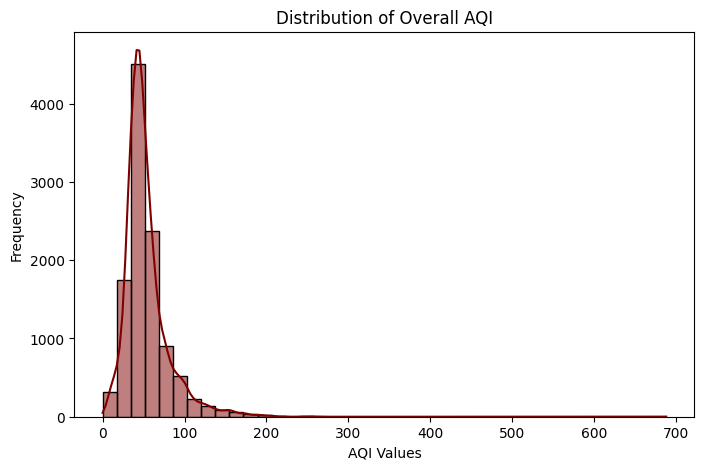

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Overall AQI Value'],bins=40,kde=True,color='maroon',edgecolor='black')
plt.title('Distribution of Overall AQI')
plt.xlabel('AQI Values')
plt.ylabel('Frequency')
plt.show()

Conclusion:

Here the data is skewed to the right, shows that there are few instances of very high AQI vale but most the data is on left side of histogram suggests that mostly the AQI is in moderate range

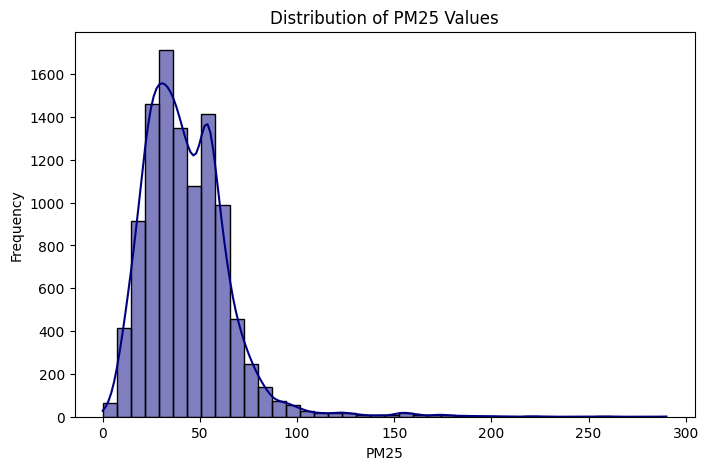

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['PM25'], bins=40, kde=True, color='navy', edgecolor='black')
plt.title('Distribution of PM25 Values')
plt.xlabel('PM25')
plt.ylabel('Frequency')
plt.show()

Conclusion:

Here very few data is skewed to the right, shows that there are few instances of very high PM25 pollutant value, but most of the data is on left side of histogram suggests that mostly the PM25 is in moderate range.

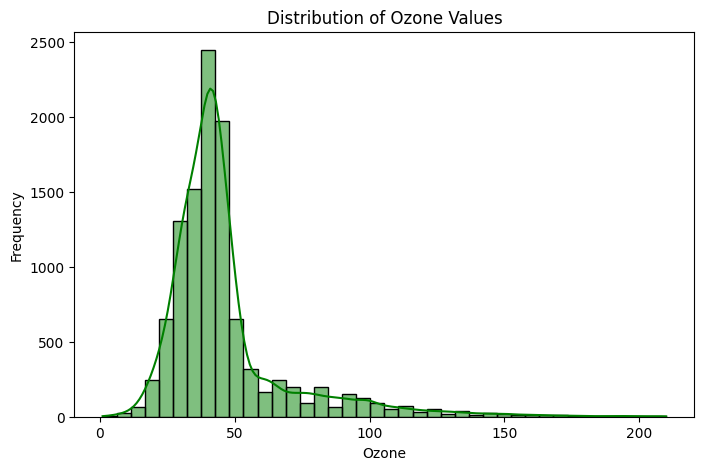

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Ozone'], bins=40, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Ozone Values')
plt.xlabel('Ozone')
plt.ylabel('Frequency')
plt.show()

Conclusion:

Here, moderate amount of data is skewed to the right, shows that there are more instances of very high Ozone value, but most of the data is on left side of histogram suggests that mostly the Ozone is in moderate range, and most of the time in high range and very few instances are there when it is in very high range.

4. Categorical Data Analysis
- Analyze the frequency of different AQI categories across the dataset.
- Count and visualize the number of measurements by state.

In [ ]:
AQI_counts = df['AQI category'].value_counts()
AQI_counts

,count
AQI category,
Good,6322
Moderate,3956
Unhealthy for Sensitive Groups,502
Unhealthy,129
Very Unhealthy,14
Hazardous,1


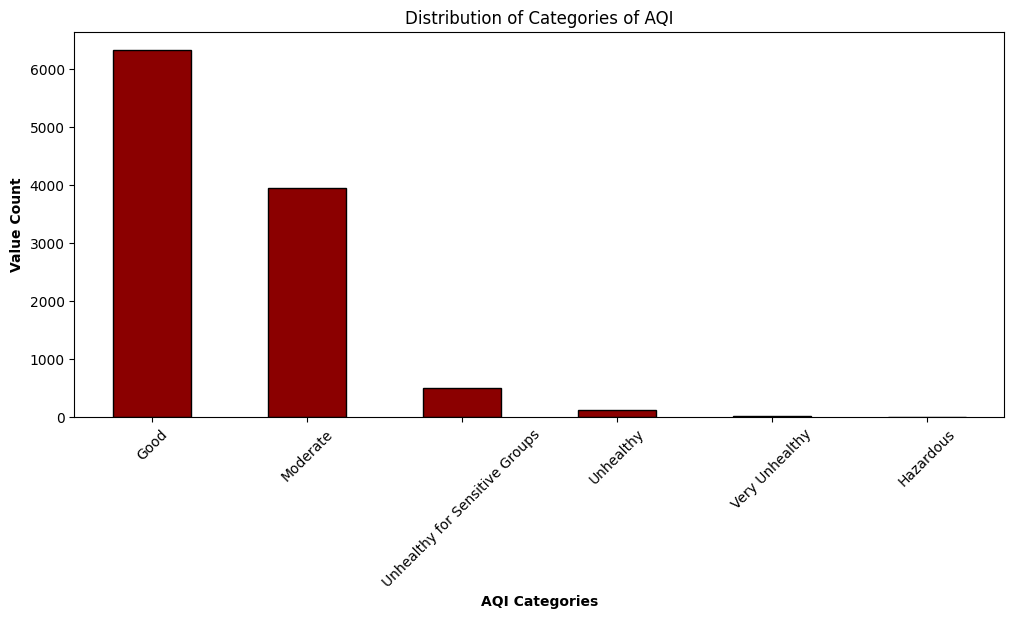

In [ ]:
plt.figure(figsize=(12,5))
AQI_counts.plot(kind='bar',color='darkred',edgecolor='black')
plt.title('Distribution of Categories of AQI')
plt.xlabel('AQI Categories',fontweight='bold')
plt.ylabel('Value Count',fontweight='bold')
plt.xticks(rotation=45)
plt.show()

CONCLUSION :
- Here 'Good' Category is at the top shows that AQI was good most of the time.
- It is followed by Moderate which was almost half of it and categories such as- "unhealthy","very unhealthy","hazardous" are least in number shows that there were extremely rare instances of bad air quality.

In [ ]:
state_counts = df['state'].value_counts()
state_counts

,count
state,
NC,1823
FL,730
TX,730
PA,730
CA,730
NY,722
DC,365
WI,365
AZ,365


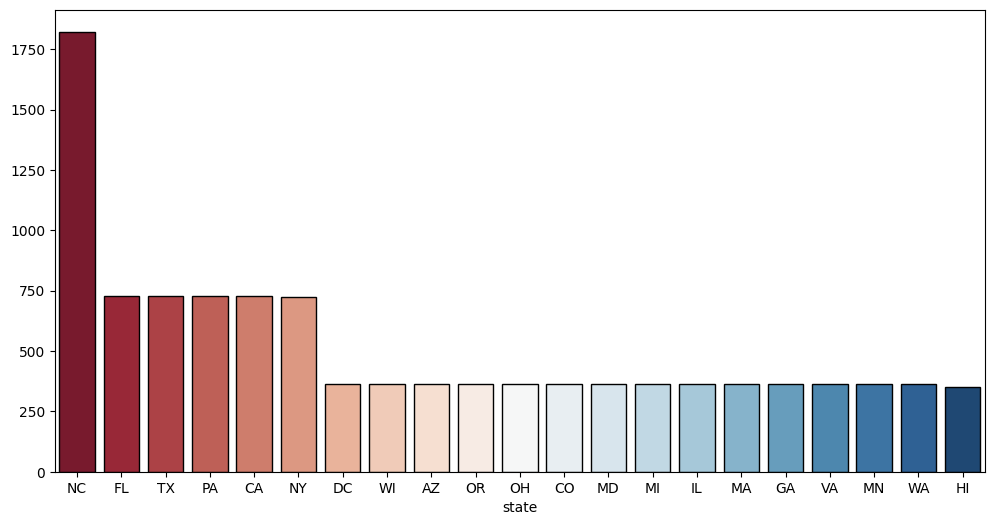

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=state_counts.index, y= state_counts.values,edgecolor='black',palette='RdBu')
plt.show()

Conclusion:

1.) Here the chart suggests that there is a huge difference among all the states on the basis of data measurements taken

2.) NC and FL had the most measurements.
3.) Many states like HI, MN, and WA don't have much measurements.

5. Time Series Analysis
- Plot the monthly average AQI to see seasonal trends in air quality.
- Determine if certain times of the year consistently show higher pollutant levels.

In [ ]:
data = df.copy()

In [ ]:
data.set_index('Date',inplace=True)

In [ ]:
monthly_avg_AQI = data['Overall AQI Value'].resample('M').mean()
monthly_avg_AQI

,Overall AQI Value
Date,
2023-01-31,43.850538
2023-02-28,44.378571
2023-03-31,47.795038
2023-04-30,54.714127
2023-05-31,58.888649
2023-06-30,74.972067
2023-07-31,67.006452
2023-08-31,60.472492
2023-09-30,51.538889


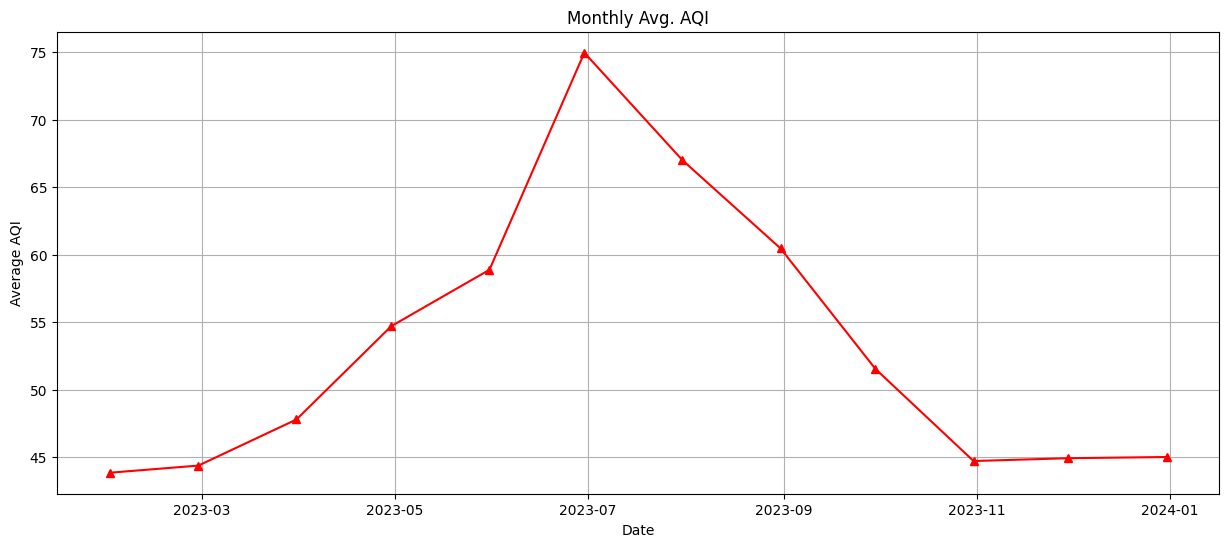

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(monthly_avg_AQI,marker='^',linestyle='-',color='red')
plt.title('Monthly Avg. AQI')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()

CONCLUSION :

1.) In Month Of July(2023-07), the avg. AQI is at it's highest, thus pollutant level is max. during this time of year.

6. Correlation Analysis
- Analyze the relationship between different pollutants. Which ones tend to rise together?
- Explore the correlation between AQI values and various pollutants.

In [ ]:
Correlation = df[['Ozone','PM25'	,'CO','PM10',	'NO2']].corr()
Correlation

,Ozone,PM25,CO,PM10,NO2
Ozone,1.000000,0.343217,0.072679,0.385577,0.273841
PM25,0.343217,1.000000,0.337014,0.500997,0.281815
CO,0.072679,0.337014,1.000000,0.257253,0.403645
PM10,0.385577,0.500997,0.257253,1.000000,0.352478
NO2,0.273841,0.281815,0.403645,0.352478,1.000000


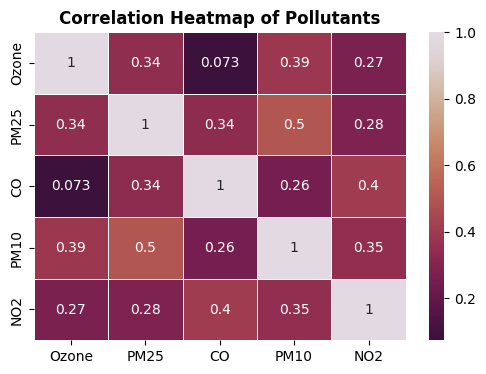

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(Correlation, annot=True, cmap='twilight', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Pollutants', fontweight='bold')
plt.show()


Correlation Insights:

1.) Ozone and PM25: There is a moderate positive correlation (0.343) between ozone and PM25. This suggests that higher levels of ozone are somewhat associated with higher levels of PM25, although the correlation is not very strong.

2.) Ozone and CO: The correlation between ozone and CO is very low (0.073), indicating that ozone levels are not affected by CO levels in the dataset.

3.) Ozone and PM10: Ozone and PM10 have a moderate positive correlation (0.386). This indicates a moderate relationship where higher ozone levels are somewhat associated with higher PM10 levels.

4.) Ozone and NO2: There is a weak positive correlation (0.274) between ozone and NO2. This suggests a mild relationship where higher ozone levels might be slightly associated with higher NO2 levels.

5.) PM2.5 and CO: PM2.5 and CO have a moderate positive correlation (0.337). This indicates a moderate relationship where higher PM2.5 levels tend to be associated with higher CO levels.

6.) PM2.5 and PM10: The correlation between PM2.5 and PM10 is moderately strong (0.501), suggesting that higher levels of PM2.5 are often associated with higher levels of PM10.

7.) PM2.5 and NO2: There is a weak positive correlation (0.282) between PM2.5 and NO2, indicating a mild association where higher PM2.5 levels are slightly related to higher NO2 levels.

8.) CO and PM10: CO and PM10 have a low positive correlation (0.257), suggesting a weak relationship between these pollutants.

9.) CO and NO2: The correlation between CO and NO2 is moderately strong (0.404), indicating that higher CO levels tend to be associated with higher NO2 levels.

10.) PM10 and NO2: PM10 and NO2 have a moderate positive correlation (0.352). This suggests that higher PM10 levels are somewhat related to higher NO2 levels.

In [ ]:
aqi_pollutant_correlation = df[['Overall AQI Value', 'Ozone', 'PM25', 'CO', 'PM10', 'NO2']].corr().loc['Overall AQI Value']
print(aqi_pollutant_correlation)


Overall AQI Value    1.000000
Ozone                0.772859
PM25                 0.747920
CO                   0.234426
PM10                 0.620499
NO2                  0.331314
Name: Overall AQI Value, dtype: float64


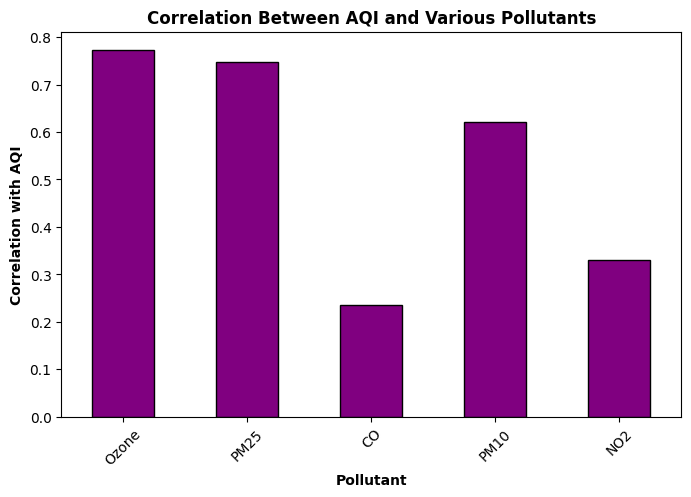

In [ ]:
plt.figure(figsize=(8, 5))
aqi_pollutant_correlation.drop('Overall AQI Value').plot(kind='bar', color='purple', edgecolor='black')
plt.title('Correlation Between AQI and Various Pollutants', fontweight='bold')
plt.xlabel('Pollutant', fontweight='bold')
plt.ylabel('Correlation with AQI', fontweight='bold')
plt.xticks(rotation=45)
plt.show()


Conclusion:

1.) Here the chart shows that higher Ozone implies with higher AQI, which means it is most responsible for bad air quality, followed by PM25 which is somewhat similar to Ozone and then PM10.

2.) NO2 and CO are least in number,i.e; their contribution is least.

7. Grouped Data Analysis
- Compare the average levels of key pollutants across different AQI categories.
- Analyze the average AQI values by city and state to identify areas with the worst air quality.

In [ ]:
grouped = df.groupby('AQI category')[['Ozone', 'PM25', 'CO', 'PM10', 'NO2']].mean()
grouped

,Ozone,PM25,CO,PM10,NO2
AQI category,,,,,
Good,37.292787,30.290848,5.827428,15.162765,22.931825
Hazardous,108.000000,145.000000,6.000000,688.000000,42.000000
Moderate,51.445905,55.593583,7.945147,28.140546,29.930485
Unhealthy,127.906977,110.403101,8.813953,50.170543,33.720930
Unhealthy for Sensitive Groups,104.296813,71.296000,7.910359,44.356574,34.898406
Very Unhealthy,148.571429,162.285714,10.214286,96.214286,37.642857


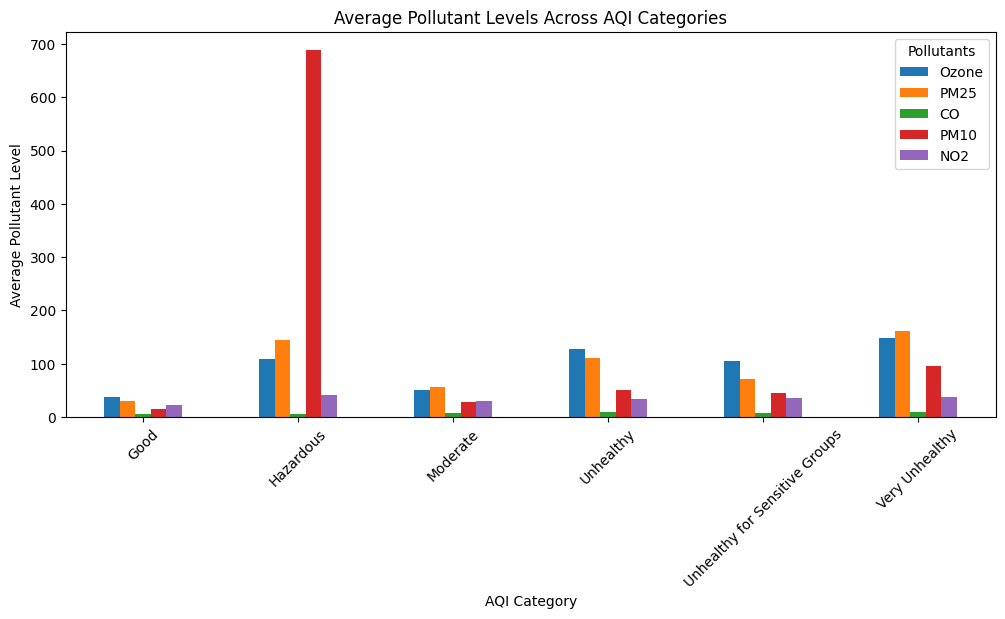

In [ ]:
grouped.plot(kind='bar', figsize=(12, 5))
plt.title('Average Pollutant Levels Across AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Average Pollutant Level')
plt.xticks(rotation = 45)
plt.legend(title='Pollutants')
plt.show()

CONCLUSION :
- The average of Good AQI is comparably less from other Categories, this is a negative sign for environmental health.
- In Hazardous Category, the highest value is 688 which is of PM10, else are of almost similar value.

In [ ]:
avg_AQI_by_city = df.groupby('city')['Overall AQI Value'].mean().sort_values(ascending=False)
avg_AQI_by_city

,Overall AQI Value
city,
Phoenix,84.084932
Los Angeles,80.413699
Houston,71.813699
Denver,67.739726
Dallas,66.336986
Chicago,63.616438
Detroit,61.432877
Philadelphia,60.145205
New York,57.723288


CONCLUSION :

Phoenix	- 84.084932

Los Angeles	- 80.413699

Houston	- 71.813699

These cities have highest AQI average values means they lie in the Very Unhealthy or even Hazardous Region.

In [ ]:
avg_AQI_by_state = df.groupby('state')['Overall AQI Value'].mean().sort_values(ascending=False)
avg_AQI_by_state

,Overall AQI Value
state,
AZ,84.084932
TX,69.075342
CO,67.739726
CA,65.379452
IL,63.616438
MI,61.432877
MN,57.186301
OH,57.117808
GA,56.969863


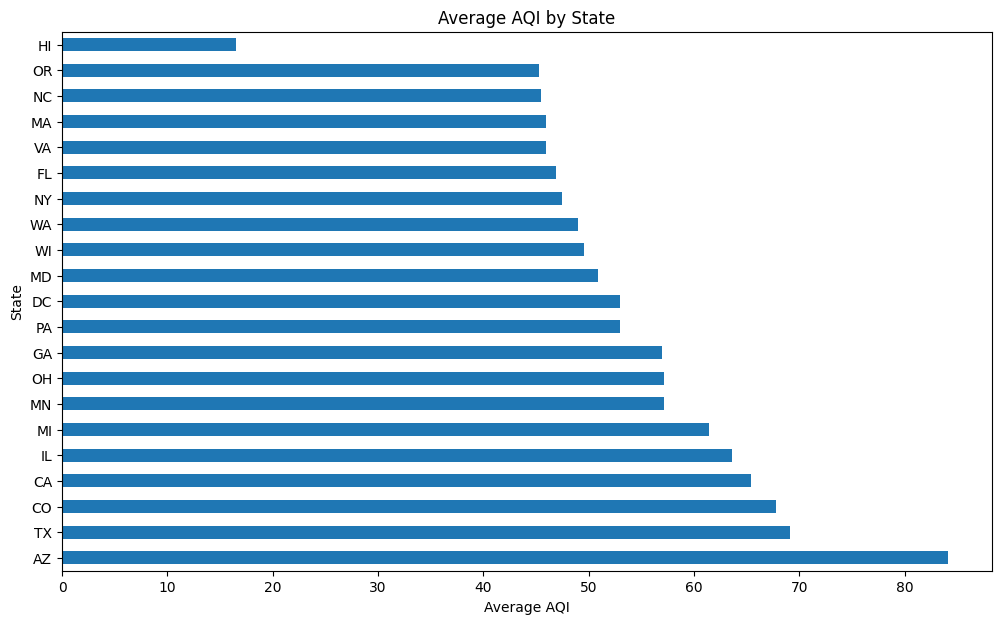

In [ ]:
avg_AQI_by_state.plot(kind='barh', figsize=(12, 7))
plt.title('Average AQI by State')
plt.xlabel('Average AQI')
plt.ylabel('State')
plt.show()


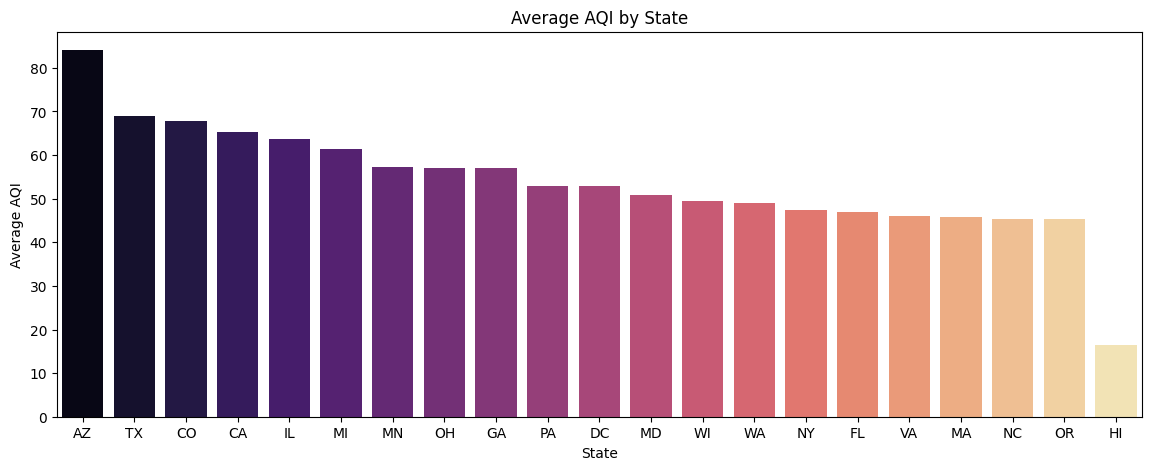

In [ ]:
# Plot average AQI by state
plt.figure(figsize=(14,5))
sns.barplot(x=avg_AQI_by_state.index,y=avg_AQI_by_state.values,palette='magma')
plt.title('Average AQI by State')
plt.ylabel('Average AQI')
plt.xlabel('State')
plt.show()

8. Text Data Analysis
- Extract the most frequently mentioned main pollutants in days categorized as 'unhealthy'.

In [ ]:
unhealthy_days = df[df['AQI category'] == 'Unhealthy']
unhealthy_days

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,PM10,NO2,AQI category,city,state
509,2023-06-02,154,Ozone,LARSEN JUNIOR HIGH,17-089-0005,AQS,154.0,114.0,7.0,46.0,37.0,Unhealthy,Chicago,IL
517,2023-06-10,151,Ozone,NORTHBROOK WATER PLANT,17-031-4201,AQS,151.0,64.0,8.0,49.0,42.0,Unhealthy,Chicago,IL
531,2023-06-24,151,Ozone,MORTON ARBORETUM,17-043-6001,AQS,151.0,76.0,7.0,54.0,45.0,Unhealthy,Chicago,IL
536,2023-06-29,163,PM2.5,CARY GROVE HS,17-111-0001,AQS,147.0,163.0,11.0,67.0,40.0,Unhealthy,Chicago,IL
553,2023-07-16,153,PM2.5,COM ED TRAINING CENTER,17-197-1011,AQS,64.0,153.0,7.0,52.0,26.0,Unhealthy,Chicago,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10455,2023-09-19,159,Ozone,Northwest Harris County,48-201-0029,AQS,159.0,62.0,10.0,20.0,47.0,Unhealthy,Houston,TX
10462,2023-09-26,151,Ozone,Galveston 99th Street,48-167-1034,AQS,151.0,44.0,8.0,16.0,35.0,Unhealthy,Houston,TX
10743,2023-07-04,163,PM2.5,TACOMA - L STREET,53-053-0029,AQS,48.0,163.0,6.0,18.0,34.0,Unhealthy,Seattle,WA
10744,2023-07-05,183,PM2.5,TACOMA - L STREET,53-053-0029,AQS,80.0,183.0,7.0,18.0,50.0,Unhealthy,Seattle,WA


In [ ]:
unhealthy_days['Main Pollutant'].value_counts().sort_values(ascending=False)

,count
Main Pollutant,
Ozone,70
PM2.5,55
PM10,4


CONCLUSION :
- There Are total 129 Unhealthy Days In Year 2023.
- The Main Pollutants Responsible for this are Ozone and PM25.

10. Anomaly Detection
- Identify any unusual patterns or outliers in AQI values across different cities or states.

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Overall AQI Value'].quantile(0.25)
Q3 = df['Overall AQI Value'].quantile(0.75)


In [ ]:
# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1


In [ ]:
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
# Filter outliers
outliers = df[(df['Overall AQI Value'] < lower_bound) | (df['Overall AQI Value'] > upper_bound)]




In [ ]:
# Display outliers
print("Number of outliers detected:", len(outliers))
outliers[['city', 'state', 'Date', 'Overall AQI Value']]

Number of outliers detected: 803


,city,state,Date,Overall AQI Value
102,Ithaca,NY,2023-04-14,100
146,Ithaca,NY,2023-05-28,97
460,Chicago,IL,2023-04-14,143
487,Chicago,IL,2023-05-11,119
498,Chicago,IL,2023-05-22,115
...,...,...,...,...
10744,Seattle,WA,2023-07-05,183
10790,Seattle,WA,2023-08-20,176
10791,Seattle,WA,2023-08-21,144
10796,Seattle,WA,2023-08-26,112


CONCLUSION :
- There are total 803 outliers in the Overall AQI Value column.

In [ ]:
outliers_by_city = outliers['city'].value_counts()

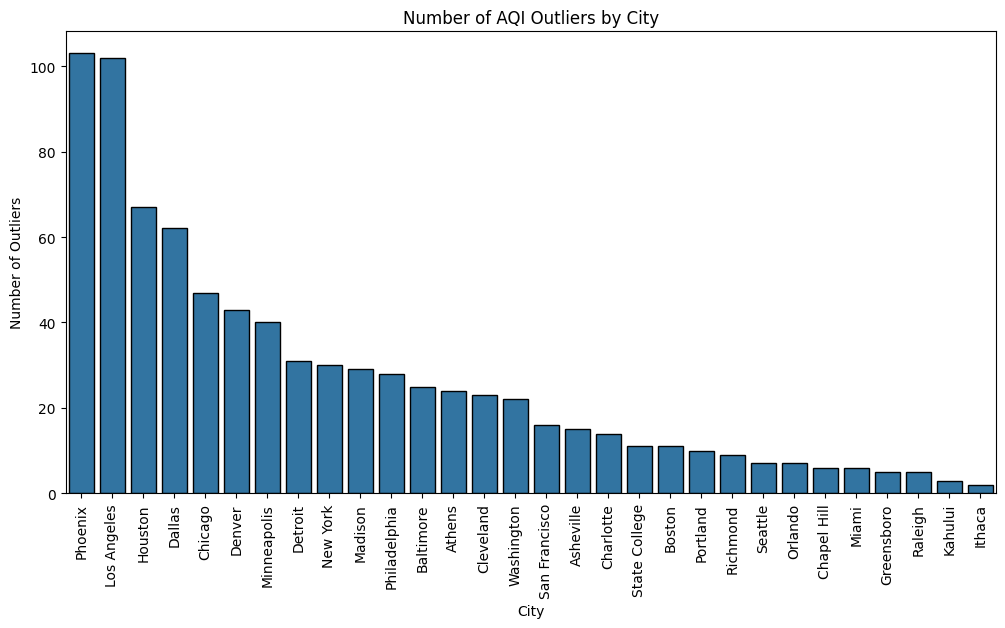

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=outliers_by_city.index, y=outliers_by_city.values, edgecolor='black')
plt.title('Number of AQI Outliers by City')
plt.xlabel('City')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=90)
plt.show()


CONCLUSION :
- Phoenix and Los Angeles have most number of outliers present.
- After that Houstan And Dallas have most outliers.
- After that Chicago, Denver and Minneapolis have the most outliers.
- After that the number of outliers and steadily decreasing.
- The cities with least number of AQl outliers are Kahului and Ithaca.

In [ ]:
# Count the number of outliers per state
outliers_by_state = outliers['state'].value_counts()

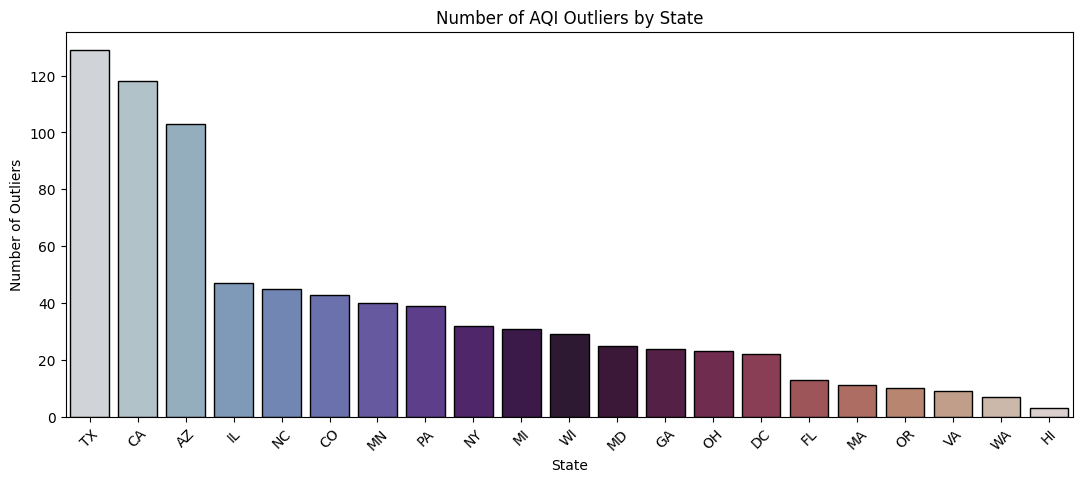

In [ ]:
# Visualize outliers by state
plt.figure(figsize=(13, 5))
sns.barplot(x=outliers_by_state.index, y=outliers_by_state.values, palette="twilight", edgecolor='black')
plt.title('Number of AQI Outliers by State')
plt.xlabel('State')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.show()